# Generating Cocycle Plots by Individual

This notebook demonstrates use of the `cocycleIndividualPlot` object. Firstly, the 
.vcf file which is converted to a genotype matrix, normalised, and rotated to its 
Principal Components before generating the plot. Secondly, the plots are generated when 
we have the Principal Components genotype matrix already saved, which is far quicker.

In [20]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import scipy
import time
from ripser import ripser
from persim import plot_diagrams

from cocycleIndividualPlot import cocycleIndividualPlot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
popinfo_path='~/../projects/HimalGenAsia/HimalGen.popinfo.csv'

## From .vcf file

In [100]:
vcf_file='/home/projects/HimalGenAsia/HimalGen.phase.vcf.gz'

cocycles_ind_plot_vcf = cocycleIndividualPlot(vcf_file=vcf_file,
                                              popinfo_path=popinfo_path)

In [101]:
cocycles_ind_plot_vcf._preprocess()

gt_matrix took 31.26880192756653 secs
SVD took 1684.9907400608063 secs
Getting ripser object


/home/harryem/anaconda3/envs/bats_p37/lib/python3.7/site-packages/ripser/ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


Ripser took 118.80737614631653 secs


Individuals in each cocycle:

{0: [2057, 2063, 2064, 2073, 2109],
 1: [1059, 1080, 1087, 1108, 1129, 1142, 2355, 2365, 2746],
 2: [58, 61, 64, 65, 66, 548, 550, 574, 1027, 1037, 2035, 2041, 2051, 2393],
 3: [1072, 1087],
 5: [2366, 2406, 2407]}


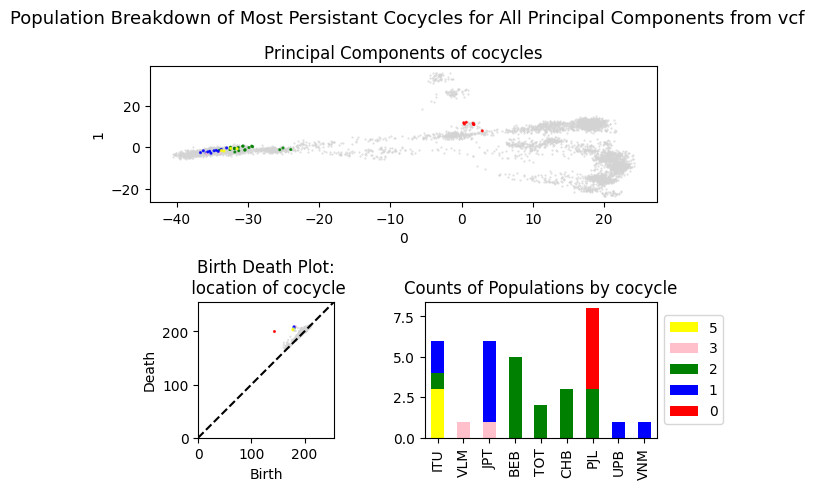

In [103]:
fig_vcf = cocycles_ind_plot_vcf.display_cocycle_charts(
    cocycle_number_list=[0,1,2,3,5],
    cocycle_individuals_file='results/cocycle_individuals.txt',
    birth_death_coordinates_file='results/birth_death_coordinates_file.txt')

fig_vcf.suptitle('Population Breakdown of Most Persistant Cocycles for All Principal Components from vcf', fontsize=13)

fig_vcf.show()

## From Precalculated Genotype Matrix Principal Components

### GT Matrix all PCs

In [6]:
gt_matrix_PCs = np.load('/home/harryem/data/HimalGen/gt_matrix_PCs.npy').T.astype(float)

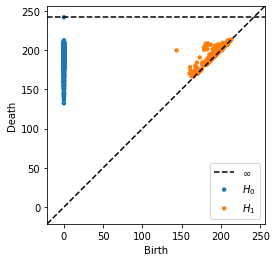

Time: 0.4 seconds


In [12]:
# PCA
start = time.time()
result_gt_pcs = ripser(gt_matrix_PCs, coeff=2, maxdim=1, do_cocycles=True)
diagrams = result_gt_pcs['dgms']
plot_diagrams(diagrams, show=True)

print("Time: {:.1f} seconds".format(time.time() - start))

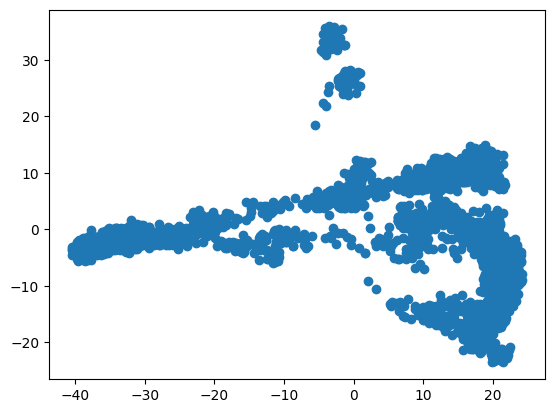

In [13]:
# gt_matrix_PCs = np.load('/home/harryem/data/HimalGen/gt_matrix_PCs.npy').T.astype(float)
plt.scatter(gt_matrix_PCs[:,0], gt_matrix_PCs[:,1])
plt.show()

In [15]:
cocycles_ind_plot_gt_pcs = cocycleIndividualPlot(popinfo_path=popinfo_path,
                                                 gt_matrix_PCs=gt_matrix_PCs,
                                                 ripser_result=result_gt_pcs)

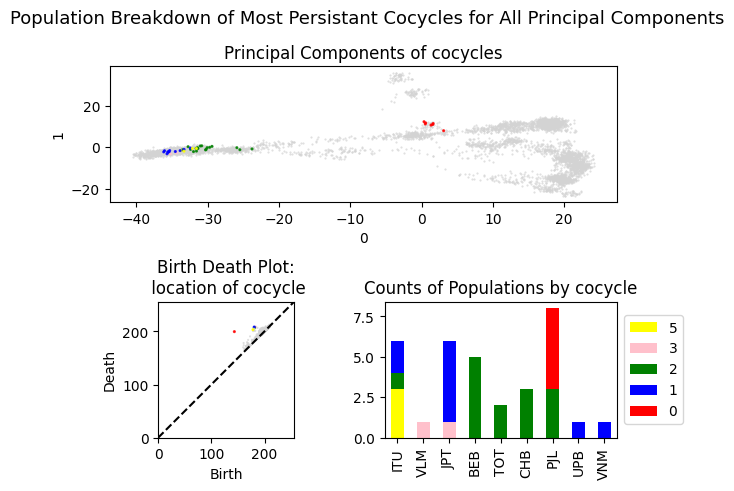

In [58]:
fig = cocycles_ind_plot_gt_pcs.display_cocycle_charts(cocycle_number_list=[0,1,2,3,5])

fig.suptitle('Population Breakdown of Most Persistant Cocycles for All Principal Components', fontsize=13)

fig.show()

### Manhattan distance matrix

In [21]:
D_Full_Man = np.load('/home/harryem/data/HimalGen/D_Full_Man.npy')
D_Full_Man = scipy.spatial.distance.squareform(D_Full_Man)

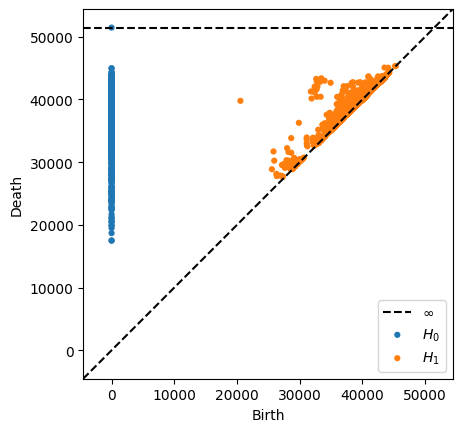

Time: 122.3 seconds


In [22]:
start = time.time()
result_manhattan = ripser(D_Full_Man, coeff=2, maxdim=1, do_cocycles=True, distance_matrix=True)
diagrams = result_manhattan['dgms']
plot_diagrams(diagrams, show=True)

print("Time: {:.1f} seconds".format(time.time() - start))

In [24]:
cocycles_ind_plot_manhattan = cocycleIndividualPlot(popinfo_path=popinfo_path,
                                                    gt_matrix_PCs=gt_matrix_PCs,
                                                    ripser_result=result_manhattan)

Individuals in each cocycle:

{0: [2057, 2063, 2064, 2073, 2109],
 1: [1059, 1129, 2355, 1108, 1142, 1080, 2746, 2365, 1087],
 2: [64, 65, 66, 1027, 548, 2051, 550, 1037, 2035, 2041, 2393, 58, 61, 574],
 3: [1072, 1087],
 5: [2378, 2375]}


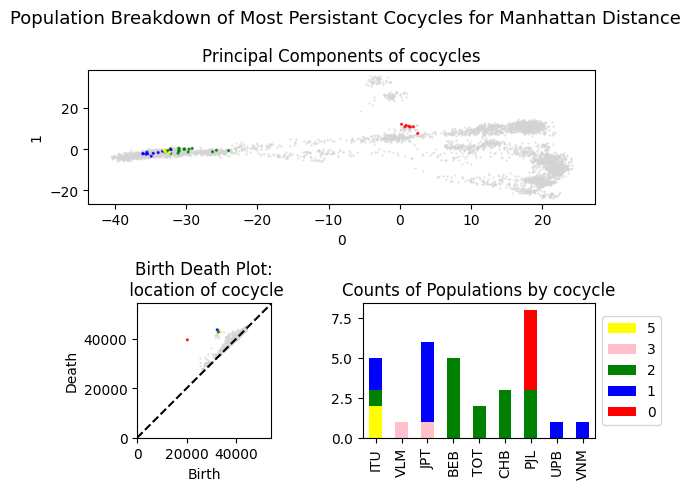

In [97]:
# Now generate final results, with options to save text and svg files as output
fig = cocycles_ind_plot_manhattan.display_cocycle_charts(
    cocycle_number_list=[0,1,2,3,5],
    cocycle_individuals_file='results/cocycle_individuals.txt',
    birth_death_coordinates_file='results/birth_death_coordinates_file.txt',
    svg_file='results/manhattan_distance_individuals_plots_01235.svg'
)

fig.suptitle('Population Breakdown of Most Persistant Cocycles for Manhattan Distance', fontsize=13)

fig.show()

Individuals in each cocycle:

{4: [513,
     6,
     11,
     2576,
     537,
     29,
     542,
     1569,
     35,
     39,
     44,
     1581,
     82,
     86,
     94,
     99,
     101,
     2662,
     2160,
     116,
     2677,
     121,
     125,
     2689,
     2690,
     2184,
     2191,
     2704,
     2195,
     2197,
     668,
     158,
     163,
     164,
     169,
     2217,
     173,
     176,
     178,
     187,
     198,
     713,
     207,
     216,
     234,
     252,
     264,
     784,
     283,
     292,
     358,
     359,
     362,
     375,
     376,
     388,
     389,
     905,
     399,
     2448,
     408,
     414,
     1441,
     2466,
     431,
     2479,
     2481,
     1462,
     2490,
     1998,
     462,
     989,
     2016,
     2017,
     2531,
     486,
     504,
     2028,
     2033,
     2545,
     2547,
     501,
     503,
     2552,
     505]}


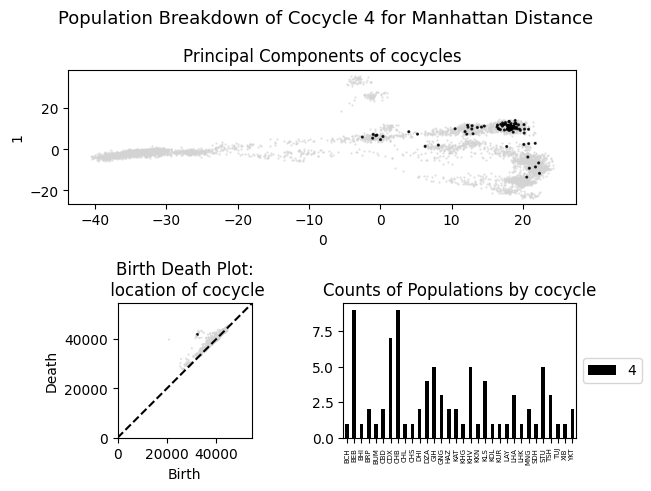

In [98]:
fig = cocycles_ind_plot_manhattan.display_cocycle_charts(
    cocycle_number_list=[4],
    svg_file='results/manhattan_distance_individuals_plots_4.svg'
)

fig.suptitle('Population Breakdown of Cocycle 4 for Manhattan Distance', fontsize=13)

fig.show()